# problem： to estimate the rain tomorrow

## 1. import libraries & dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

DF = pd.read_csv ('weatherAUS.csv')

In [2]:
%%html
<style>
.output_wrapper .output {
  overflow-y: visible;
  height: fit-content;
}

## 2. EDA

In [3]:
DF.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
DF.shape

(145460, 23)

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [6]:
# numerical variable
DF.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [7]:
# categorical variable
DF.describe (include=['object'])

Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460    145460      135134     134894     141232    142199   
unique        3436        49          16         16         16         2   
top     2013-03-28  Canberra           W          N         SE        No   
freq            49      3436        9915      11758      10838    110319   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316

## 2.1 DATA CLEANING

### change date into year, month and day

In [8]:
DF['Date'] = pd.to_datetime(DF['Date'])

In [9]:
DF['Year'] = DF['Date'].dt.year
DF['Month'] = DF['Date'].dt.month
DF['Day'] = DF['Date'].dt.day

In [10]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [11]:
DF.drop('Date',axis=1,inplace=True)
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [12]:
DF.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       NaN   
1           44.0        NNW        WSW  ...       1007.8       NaN       NaN   
2           46.0          W        WSW  ...       1008.7       NaN       2.0   
3           24.0         SE          E  ...       1012.8       NaN       NaN   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0     16.9     21.8         No            No  2008     12    1  
1     17.2     24.3         No            No  2008     12    2  
2     21.0     23.2         No            No  2008     12    3  
3     18.1     26.5         No            No  2008     12    4  
4     17.8     29.7         No            No  2008     12    5  

[5 rows x 25 columns]

### 2.2 Univariate analysis

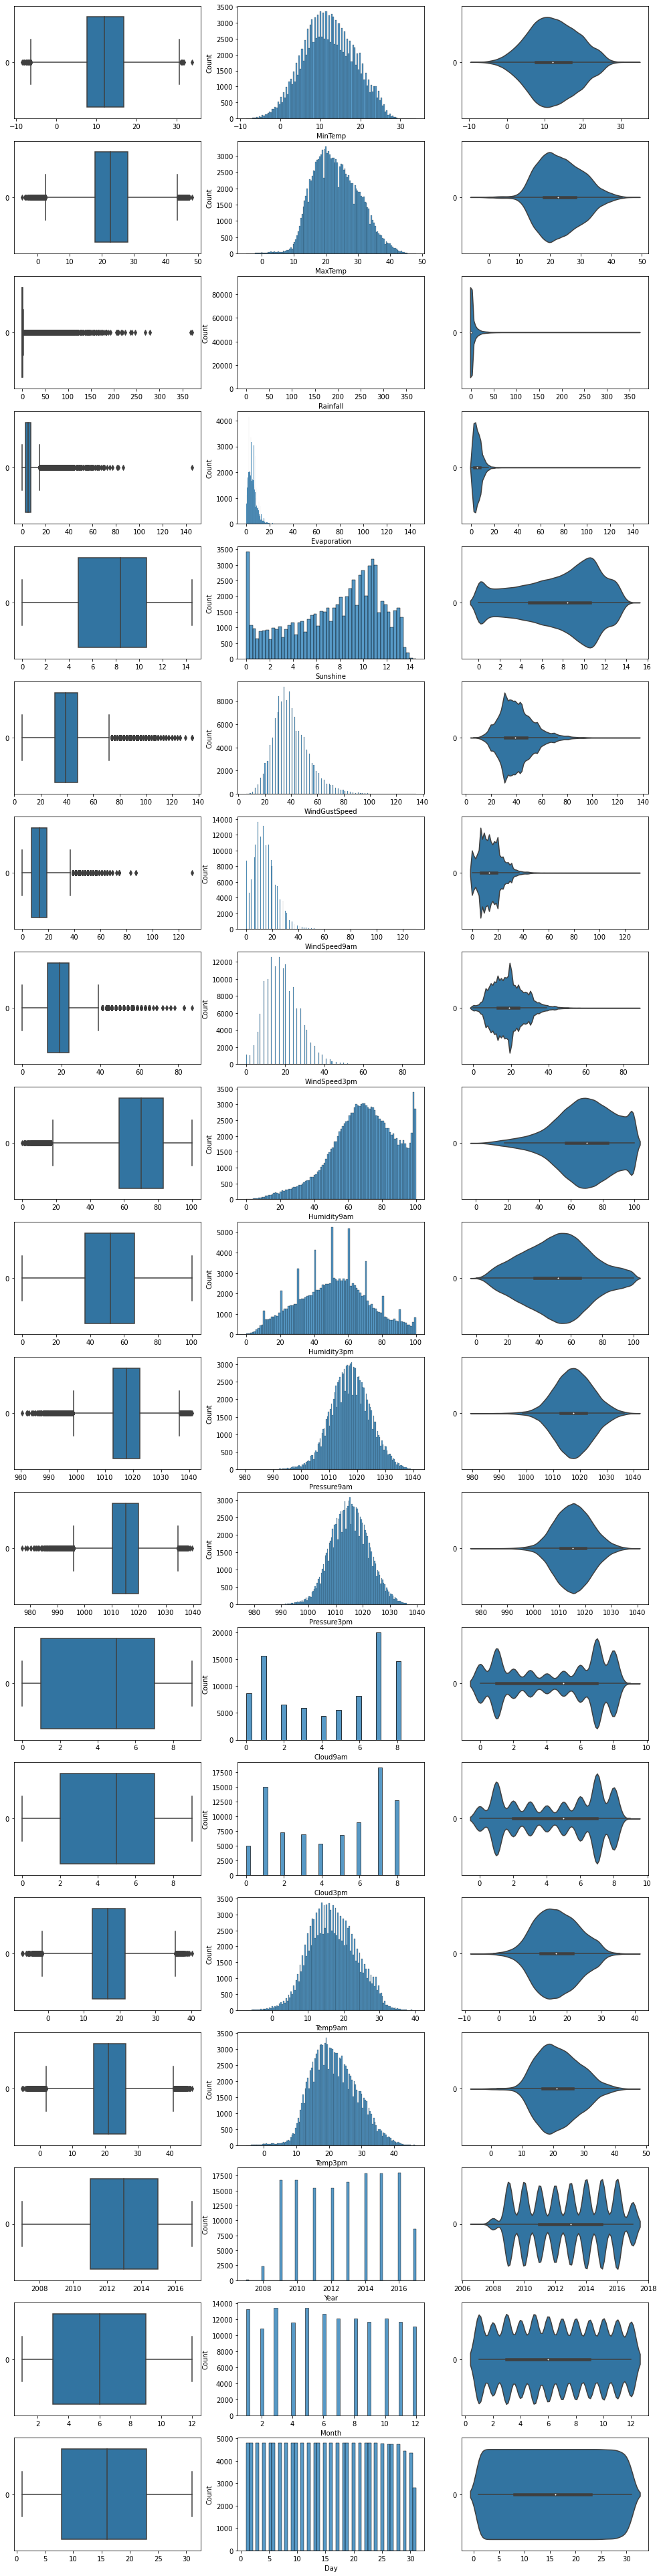

In [13]:
f, axes = plt.subplots(19, 3, figsize=(17, 70))

count = 0
for var in DF.columns:
    if DF[var].dtype!='O':
        sb.boxplot(data = DF[var], orient = "h", ax = axes[count,0])
        sb.histplot(data = DF[var], ax = axes[count,1])
        sb.violinplot(data = DF[var], orient = "h", ax = axes[count,2])
        count += 1

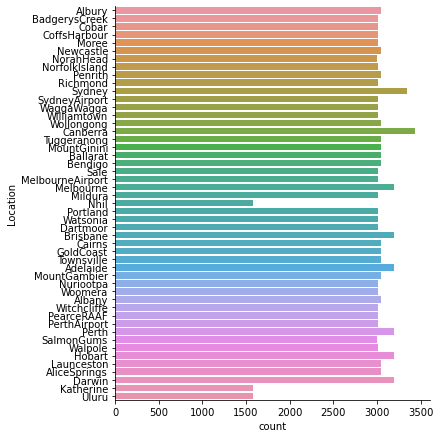

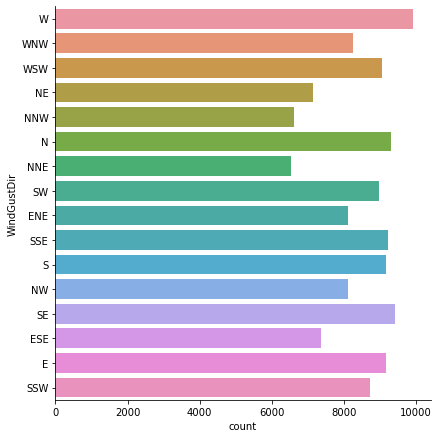

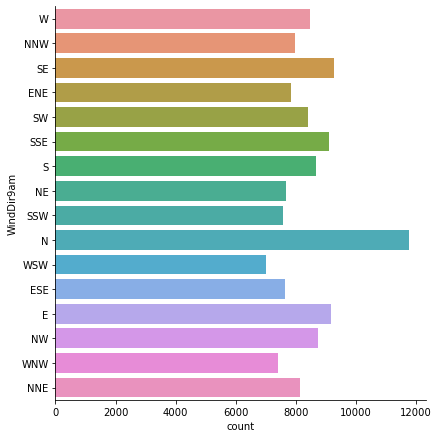

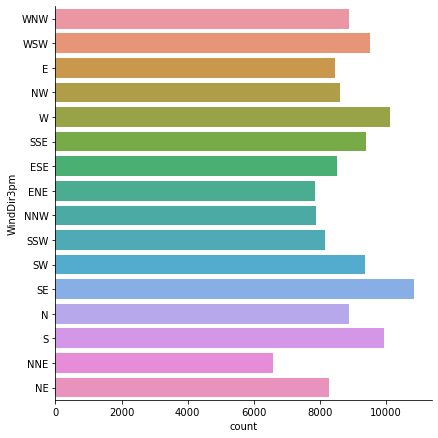

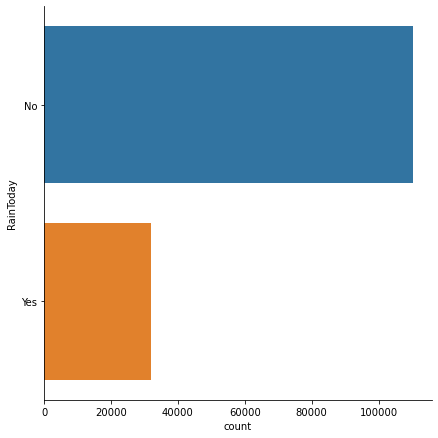

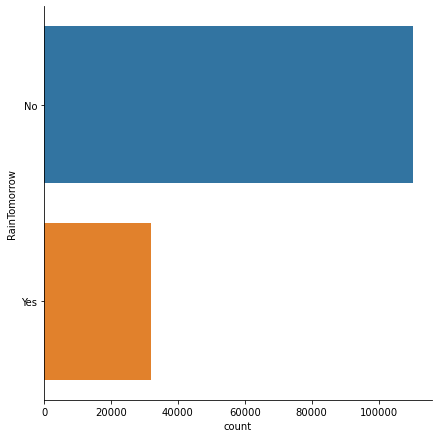

In [14]:
count = 0
for var in DF.columns:
    if DF[var].dtype =='O':
        sb.catplot(y = var, data = DF, kind = "count", height = 6)
        count += 1

### 2.3 analyse categorical and numerical variable

In [15]:
for each_var in DF:
    print ('variable : ', each_var)
    
    print ('number of empty data : ', DF[each_var].isnull().sum())
    
    print ('number of unique result : ', DF[each_var].nunique())
    
    print()

variable :  Location
number of empty data :  0
number of unique result :  49

variable :  MinTemp
number of empty data :  1485
number of unique result :  389

variable :  MaxTemp
number of empty data :  1261
number of unique result :  505

variable :  Rainfall
number of empty data :  3261
number of unique result :  681

variable :  Evaporation
number of empty data :  62790
number of unique result :  358

variable :  Sunshine
number of empty data :  69835
number of unique result :  145

variable :  WindGustDir
number of empty data :  10326
number of unique result :  16

variable :  WindGustSpeed
number of empty data :  10263
number of unique result :  67

variable :  WindDir9am
number of empty data :  10566
number of unique result :  16

variable :  WindDir3pm
number of empty data :  4228
number of unique result :  16

variable :  WindSpeed9am
number of empty data :  1767
number of unique result :  43

variable :  WindSpeed3pm
number of empty data :  3062
number of unique result :  44



#### 2.3.1 categorical variable

In [16]:
categorical = [var for var in DF.columns if DF[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 6 categorical variables

The categorical variables are : ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [17]:
DF_cat = DF[categorical]
DF_cat.head()

Location WindGustDir WindDir9am WindDir3pm RainToday RainTomorrow
0   Albury           W          W        WNW        No           No
1   Albury         WNW        NNW        WSW        No           No
2   Albury         WSW          W        WSW        No           No
3   Albury          NE         SE          E        No           No
4   Albury           W        ENE         NW        No           No

In [18]:
for var in DF_cat.columns: 
    
    print('number of unique values in ' + var + ':' ,len(DF[var].unique()))

number of unique values in Location: 49
number of unique values in WindGustDir: 17
number of unique values in WindDir9am: 17
number of unique values in WindDir3pm: 17
number of unique values in RainToday: 3
number of unique values in RainTomorrow: 3


In [19]:
print('unique value in Location : ',DF.Location.unique())
print('unique value in WindGustDir : ',DF.WindGustDir.unique())
print('unique value in WindDir9am : ',DF.WindDir9am.unique())
print('unique value in WindDir3pm : ',DF.WindDir3pm.unique())
print('unique value in RainToday : ',DF.RainToday.unique())
print('unique value in RainTomorrow : ',DF.RainTomorrow.unique())

unique value in Location :  ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
unique value in WindGustDir :  ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
unique value in WindDir9am :  ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
unique value in WindDir3pm :  ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
unique value in RainToday :

In [20]:
for var in DF_cat.columns: 
    
    print(DF[var].value_counts())
    print()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Adelaide            3193
Perth               3193
Hobart              3193
Brisbane            3193
Albany              3040
Albury              3040
GoldCoast           3040
AliceSprings        3040
Wollongong          3040
Bendigo             3040
Launceston          3040
Townsville          3040
MountGambier        3040
Cairns              3040
Ballarat            3040
MountGinini         3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
BadgerysCreek       3009
Dartmoor            3009
Sale                3009
WaggaWagga          3009
SydneyAirport       3009
Portland            3009
Cobar               3009
Woomera             3009
Moree               3009
Nuriootpa           3009
Williamtown         3009
Witchcliffe         3009
PerthAirport        3009
Richmond            3009
MelbourneAirport    3009
PearceRAAF          3009
NorfolkIsland       3009


In [21]:
for var in DF_cat.columns: 
    
    print(DF[var].value_counts()/np.float(len(DF)))
    print()

Canberra            0.023622
Sydney              0.022989
Darwin              0.021951
Melbourne           0.021951
Adelaide            0.021951
Perth               0.021951
Hobart              0.021951
Brisbane            0.021951
Albany              0.020899
Albury              0.020899
GoldCoast           0.020899
AliceSprings        0.020899
Wollongong          0.020899
Bendigo             0.020899
Launceston          0.020899
Townsville          0.020899
MountGambier        0.020899
Cairns              0.020899
Ballarat            0.020899
MountGinini         0.020899
Newcastle           0.020892
Tuggeranong         0.020892
Penrith             0.020892
BadgerysCreek       0.020686
Dartmoor            0.020686
Sale                0.020686
WaggaWagga          0.020686
SydneyAirport       0.020686
Portland            0.020686
Cobar               0.020686
Woomera             0.020686
Moree               0.020686
Nuriootpa           0.020686
Williamtown         0.020686
Witchcliffe   

In [22]:
DF_cat.isnull().sum()

Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

#### 2.3.1.1 convert categorical data into dummy variable

In [23]:
#Location
DF.Location.value_counts()

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Adelaide            3193
Perth               3193
Hobart              3193
Brisbane            3193
Albany              3040
Albury              3040
GoldCoast           3040
AliceSprings        3040
Wollongong          3040
Bendigo             3040
Launceston          3040
Townsville          3040
MountGambier        3040
Cairns              3040
Ballarat            3040
MountGinini         3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
BadgerysCreek       3009
Dartmoor            3009
Sale                3009
WaggaWagga          3009
SydneyAirport       3009
Portland            3009
Cobar               3009
Woomera             3009
Moree               3009
Nuriootpa           3009
Williamtown         3009
Witchcliffe         3009
PerthAirport        3009
Richmond            3009
MelbourneAirport    3009
PearceRAAF          3009
NorfolkIsland       3009


In [24]:
pd.get_dummies(DF.Location, 
              ).head()

Adelaide  Albany  Albury  AliceSprings  BadgerysCreek  Ballarat  Bendigo  \
0         0       0       1             0              0         0        0   
1         0       0       1             0              0         0        0   
2         0       0       1             0              0         0        0   
3         0       0       1             0              0         0        0   
4         0       0       1             0              0         0        0   

   Brisbane  Cairns  Canberra  ...  Townsville  Tuggeranong  Uluru  \
0         0       0         0  ...           0            0      0   
1         0       0         0  ...           0            0      0   
2         0       0         0  ...           0            0      0   
3         0       0         0  ...           0            0      0   
4         0       0         0  ...           0            0      0   

   WaggaWagga  Walpole  Watsonia  Williamtown  Witchcliffe  Wollongong  \
0           0        0         0            0            0           0   
1           0        0         0            0            0           0   
2           0        0         0            0            0           0   
3           0        0         0            0            0           0   
4           0        0         0            0            0           0   

   Woomera  
0        0  
1        0  
2        0  
3        0  
4        0  

[5 rows x 49 columns]

In [25]:
#WindGustDir
DF.WindGustDir.value_counts()

W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: WindGustDir, dtype: int64

In [26]:
pd.get_dummies(DF.WindGustDir,  
               dummy_na=True).head()

E  ENE  ESE  N  NE  NNE  NNW  NW  S  SE  SSE  SSW  SW  W  WNW  WSW  NaN
0  0    0    0  0   0    0    0   0  0   0    0    0   0  1    0    0    0
1  0    0    0  0   0    0    0   0  0   0    0    0   0  0    1    0    0
2  0    0    0  0   0    0    0   0  0   0    0    0   0  0    0    1    0
3  0    0    0  0   1    0    0   0  0   0    0    0   0  0    0    0    0
4  0    0    0  0   0    0    0   0  0   0    0    0   0  1    0    0    0

In [27]:
pd.get_dummies(DF.WindGustDir, 
               dummy_na=True).sum(axis=0)

E       9181
ENE     8104
ESE     7372
N       9313
NE      7133
NNE     6548
NNW     6620
NW      8122
S       9168
SE      9418
SSE     9216
SSW     8736
SW      8967
W       9915
WNW     8252
WSW     9069
NaN    10326
dtype: int64

In [28]:
#WindDir9am
DF.WindDir9am.value_counts()

N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: WindDir9am, dtype: int64

In [29]:
pd.get_dummies(DF.WindDir9am, 
               dummy_na=True).head()

E  ENE  ESE  N  NE  NNE  NNW  NW  S  SE  SSE  SSW  SW  W  WNW  WSW  NaN
0  0    0    0  0   0    0    0   0  0   0    0    0   0  1    0    0    0
1  0    0    0  0   0    0    1   0  0   0    0    0   0  0    0    0    0
2  0    0    0  0   0    0    0   0  0   0    0    0   0  1    0    0    0
3  0    0    0  0   0    0    0   0  0   1    0    0   0  0    0    0    0
4  0    1    0  0   0    0    0   0  0   0    0    0   0  0    0    0    0

In [30]:
pd.get_dummies(DF.WindDir9am, 
               dummy_na=True).sum(axis=0)

E       9176
ENE     7836
ESE     7630
N      11758
NE      7671
NNE     8129
NNW     7980
NW      8749
S       8659
SE      9287
SSE     9112
SSW     7587
SW      8423
W       8459
WNW     7414
WSW     7024
NaN    10566
dtype: int64

In [31]:
# WindDir3pm
DF.WindDir3pm.value_counts()

SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: WindDir3pm, dtype: int64

In [32]:
pd.get_dummies(DF.WindDir3pm,  
               dummy_na=True).head()

E  ENE  ESE  N  NE  NNE  NNW  NW  S  SE  SSE  SSW  SW  W  WNW  WSW  NaN
0  0    0    0  0   0    0    0   0  0   0    0    0   0  0    1    0    0
1  0    0    0  0   0    0    0   0  0   0    0    0   0  0    0    1    0
2  0    0    0  0   0    0    0   0  0   0    0    0   0  0    0    1    0
3  1    0    0  0   0    0    0   0  0   0    0    0   0  0    0    0    0
4  0    0    0  0   0    0    0   1  0   0    0    0   0  0    0    0    0

In [33]:
pd.get_dummies(DF.WindDir3pm,  
               dummy_na=True).sum(axis=0)

E       8472
ENE     7857
ESE     8505
N       8890
NE      8263
NNE     6590
NNW     7870
NW      8610
S       9926
SE     10838
SSE     9399
SSW     8156
SW      9354
W      10110
WNW     8874
WSW     9518
NaN     4228
dtype: int64

In [34]:
# RainToday
DF.RainToday.value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [35]:
pd.get_dummies(DF.RainToday,  
               dummy_na=True).head()

No  Yes  NaN
0   1    0    0
1   1    0    0
2   1    0    0
3   1    0    0
4   1    0    0

In [36]:
pd.get_dummies(DF.RainToday,  
               dummy_na=True).sum(axis=0)

No     110319
Yes     31880
NaN      3261
dtype: int64

In [37]:
# RainTomorrow
DF.RainTomorrow.value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [38]:
pd.get_dummies(DF.RainTomorrow, 
               dummy_na=True).head()

No  Yes  NaN
0   1    0    0
1   1    0    0
2   1    0    0
3   1    0    0
4   1    0    0

In [39]:
pd.get_dummies(DF.RainTomorrow,  
               dummy_na=True).sum(axis=0)

No     110316
Yes     31877
NaN      3267
dtype: int64

### 2.3.2 explore numerical variable

In [40]:
numerical = [var for var in DF.columns if DF[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [41]:
DF_num = DF[numerical]
DF_num.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   
2     12.9     25.7       0.0          NaN       NaN           46.0   
3      9.2     28.0       0.0          NaN       NaN           24.0   
4     17.5     32.3       1.0          NaN       NaN           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  Year  Month  Day  
0       1007.1       8.0       NaN     16.9     21.8  2008     12    1  
1       1007.8       NaN       NaN     17.2     24.3  2008     12    2  
2       1008.7       NaN       2.0     21.0     23.2  2008     12    3  
3       1012.8       NaN       NaN     18.1     26.5  2008     12    4  
4       1006.0       7.0       8.0     17.8     29.7  2008     12    5

In [42]:
DF[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

#### 2.3.2.1 check outliers

In [43]:
print(round(DF[numerical].describe()))

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

In [44]:
for var in numerical:
    Q1 = DF[var].quantile(0.25)
    Q3 = DF[var].quantile(0.75)
    IQR = Q3 - Q1
    Lower_fence = Q1 - (IQR * 1.5)
    Upper_fence = Q3 + (IQR * 1.5)
    print( var,'outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
    print ()

MinTemp outliers are values < -6.35 or > 30.849999999999998

MaxTemp outliers are values < 2.4499999999999975 or > 43.65

Rainfall outliers are values < -1.2000000000000002 or > 2.0

Evaporation outliers are values < -4.600000000000001 or > 14.600000000000001

Sunshine outliers are values < -3.8999999999999995 or > 19.299999999999997

WindGustSpeed outliers are values < 5.5 or > 73.5

WindSpeed9am outliers are values < -11.0 or > 37.0

WindSpeed3pm outliers are values < -3.5 or > 40.5

Humidity9am outliers are values < 18.0 or > 122.0

Humidity3pm outliers are values < -6.5 or > 109.5

Pressure9am outliers are values < 998.65 or > 1036.65

Pressure3pm outliers are values < 996.0 or > 1034.4

Cloud9am outliers are values < -8.0 or > 16.0

Cloud3pm outliers are values < -5.5 or > 14.5

Temp9am outliers are values < -1.6500000000000004 or > 35.550000000000004

Temp3pm outliers are values < 1.9000000000000057 or > 41.099999999999994

Year outliers are values < 2005.0 or > 2021.0

Month out

In [45]:
Q1 = DF.quantile(0.25)
Q3 = DF.quantile(0.75)
IQR = Q3-Q1

rule = ((DF< (Q1 - 1.5 * IQR)) | (DF > (Q3 + 1.5 * IQR)))
rule.sum()

Cloud3pm             0
Cloud9am             0
Day                  0
Evaporation       1995
Humidity3pm          0
Humidity9am       1425
Location             0
MaxTemp            489
MinTemp             54
Month                0
Pressure3pm        919
Pressure9am       1191
RainToday            0
RainTomorrow         0
Rainfall         25578
Sunshine             0
Temp3pm            764
Temp9am            262
WindDir3pm           0
WindDir9am           0
WindGustDir          0
WindGustSpeed     3092
WindSpeed3pm      2523
WindSpeed9am      1817
Year                 0
dtype: int64

In [46]:
# with greater confidence interval (k=3)

In [47]:
for var in numerical:
    Q1 = DF[var].quantile(0.25)
    Q3 = DF[var].quantile(0.75)
    IQR = Q3 - Q1
    Lower_fence = Q1 - (IQR * 3)
    Upper_fence = Q3 + (IQR * 3)
    print( var,'outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))
    print ()

MinTemp outliers are values < -20.299999999999997 or > 44.8

MaxTemp outliers are values < -13.000000000000004 or > 59.1

Rainfall outliers are values < -2.4000000000000004 or > 3.2

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004

Sunshine outliers are values < -12.599999999999998 or > 28.0

WindGustSpeed outliers are values < -20.0 or > 99.0

WindSpeed9am outliers are values < -29.0 or > 55.0

WindSpeed3pm outliers are values < -20.0 or > 57.0

Humidity9am outliers are values < -21.0 or > 161.0

Humidity3pm outliers are values < -50.0 or > 153.0

Pressure9am outliers are values < 984.4 or > 1050.9

Pressure3pm outliers are values < 981.5999999999999 or > 1048.8000000000002

Cloud9am outliers are values < -17.0 or > 25.0

Cloud3pm outliers are values < -13.0 or > 22.0

Temp9am outliers are values < -15.600000000000001 or > 49.5

Temp3pm outliers are values < -12.79999999999999 or > 55.79999999999999

Year outliers are values < 1999.0 or > 2027.0

Month ou

In [48]:
Q1 = DF.quantile(0.25)
Q3 = DF.quantile(0.75)
IQR = Q3-Q1

rule = ((DF< (Q1 - 3 * IQR)) | (DF > (Q3 + 3 * IQR)))
rule.sum()

Cloud3pm             0
Cloud9am             0
Day                  0
Evaporation        481
Humidity3pm          0
Humidity9am          0
Location             0
MaxTemp              0
MinTemp              0
Month                0
Pressure3pm          7
Pressure9am          8
RainToday            0
RainTomorrow         0
Rainfall         20762
Sunshine             0
Temp3pm              0
Temp9am              0
WindDir3pm           0
WindDir9am           0
WindGustDir          0
WindGustSpeed      153
WindSpeed3pm        82
WindSpeed9am       114
Year                 0
dtype: int64

#### 2.3.2.2 Analyse high skew variable

In [49]:
# skewness 
DF.skew()
## skewness == 0 = normal distribution

MinTemp          0.021188
MaxTemp          0.220839
Rainfall         9.836225
Evaporation      3.761286
Sunshine        -0.496480
WindGustSpeed    0.874879
WindSpeed9am     0.777630
WindSpeed3pm     0.628215
Humidity9am     -0.483969
Humidity3pm      0.033614
Pressure9am     -0.095524
Pressure3pm     -0.045621
Cloud9am        -0.229082
Cloud3pm        -0.226384
Temp9am          0.088540
Temp3pm          0.237960
Year            -0.049357
Month            0.030343
Day              0.009040
dtype: float64

In [50]:
for var in DF_num.columns:
    if DF[var].skew() > 0.5:
        print (var)

Rainfall
Evaporation
WindGustSpeed
WindSpeed9am
WindSpeed3pm


Text(0.5, 1.0, '')

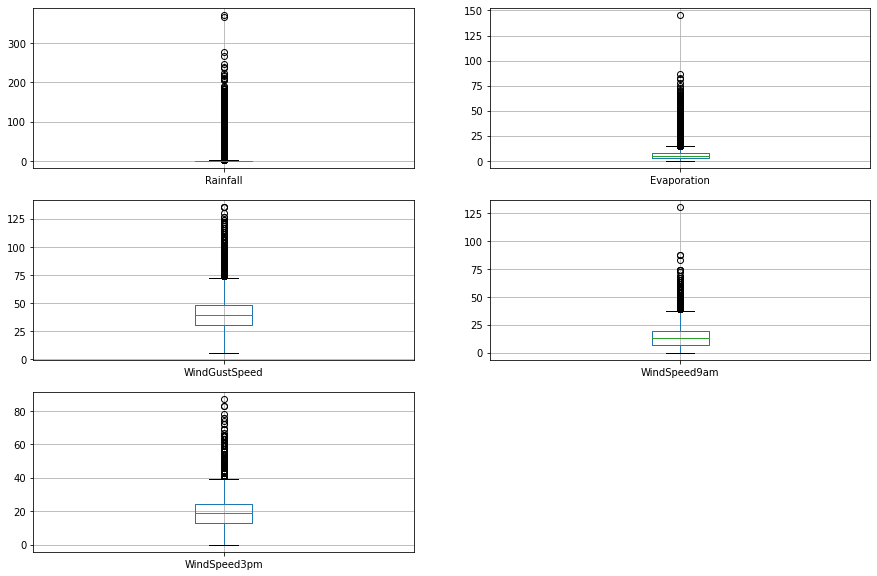

In [51]:
plt.figure(figsize=(15,10))

plt.subplot(3, 2, 1)
fig = DF.boxplot(column='Rainfall')
fig.set_title('')

plt.subplot(3, 2, 2)
fig = DF.boxplot(column='Evaporation')
fig.set_title('')

plt.subplot(3, 2, 3)
fig = DF.boxplot(column='WindGustSpeed')
fig.set_title('')

plt.subplot(3, 2, 4)
fig = DF.boxplot(column='WindSpeed9am')
fig.set_title('')

plt.subplot(3, 2, 5)
fig = DF.boxplot(column='WindSpeed3pm')
fig.set_title('')

## 2.4 Bivariate analysis

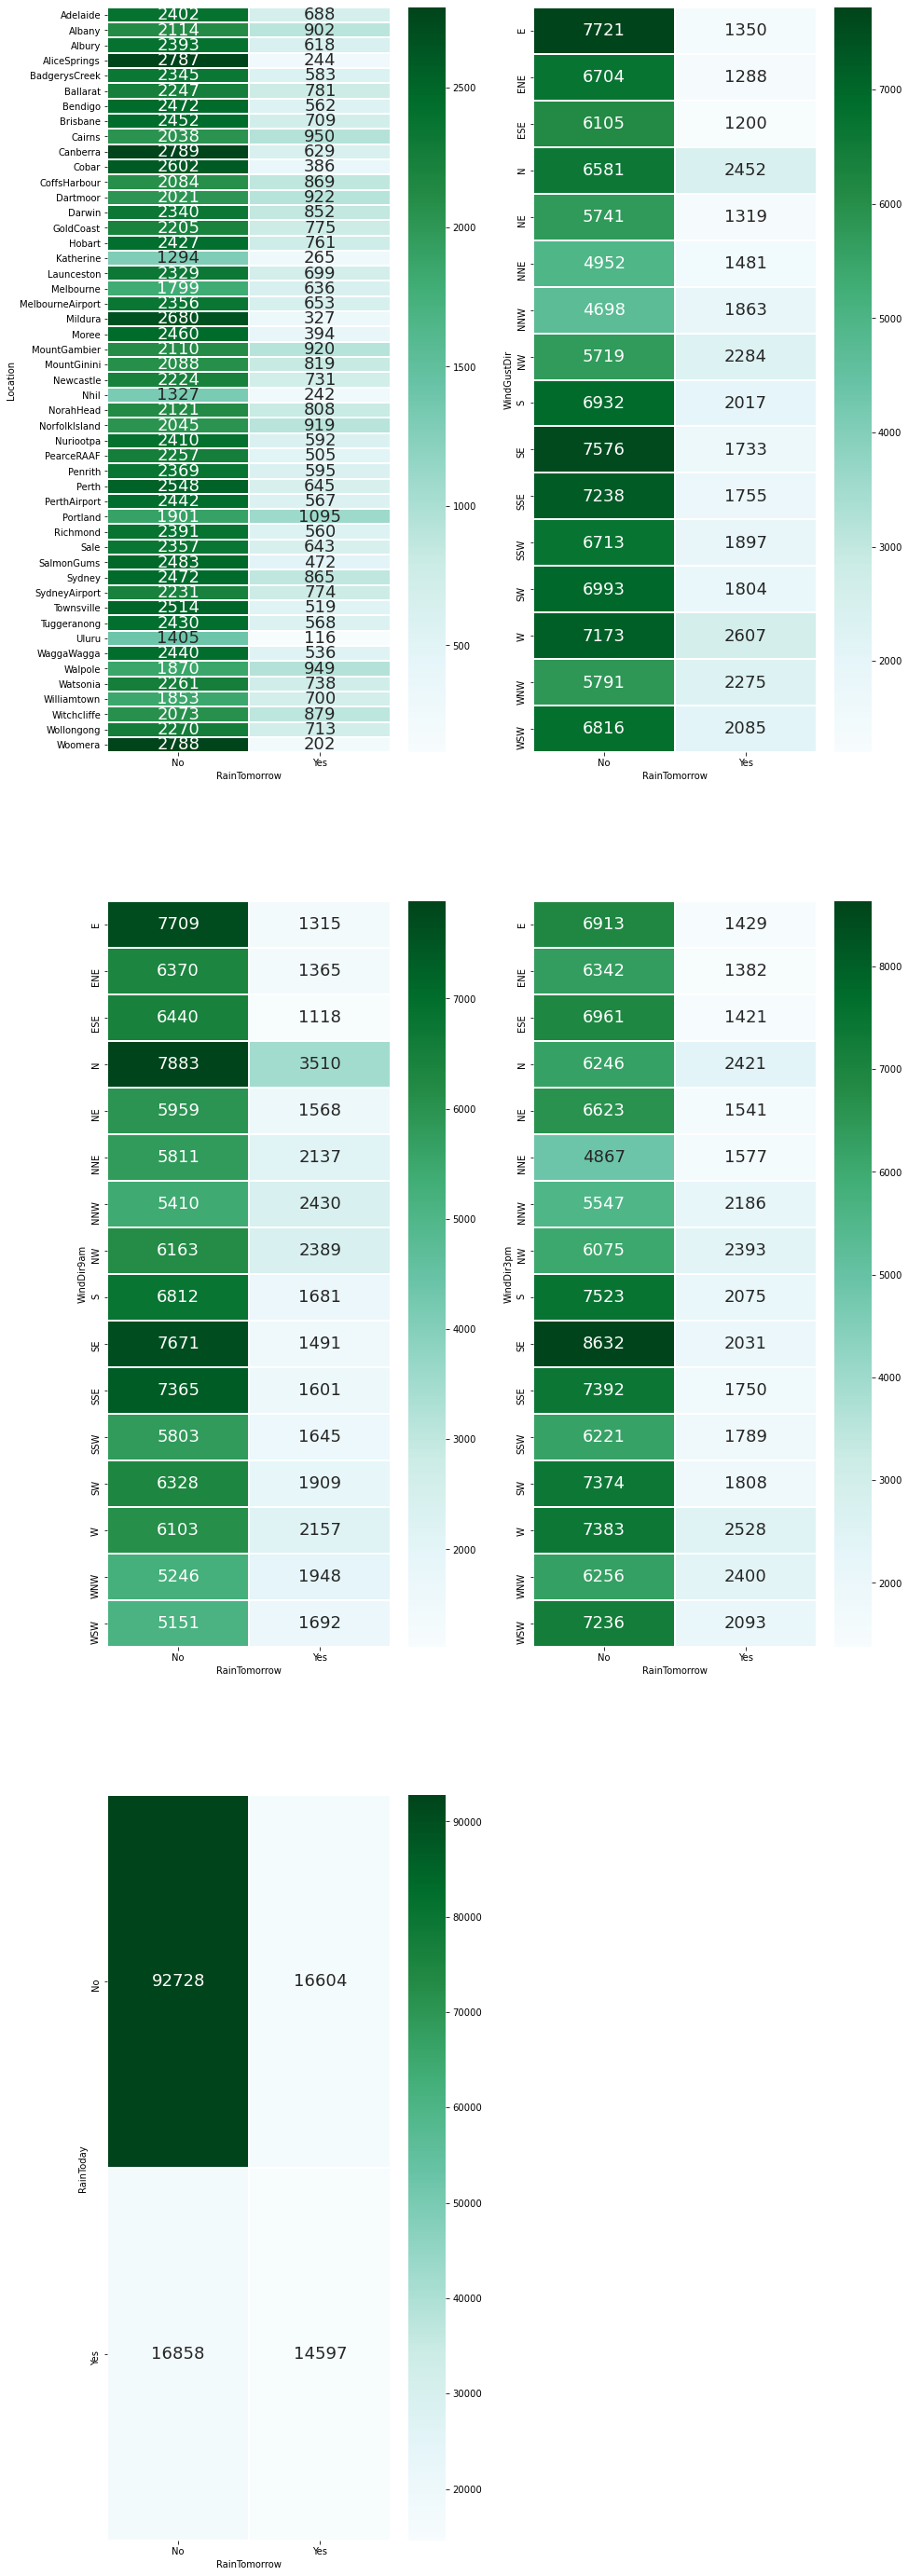

In [52]:
# check distribution
plt.figure(figsize=(15,50))
count=0

for var in DF_cat.columns:
    if var != 'RainTomorrow':
        plt.subplot(3, 2, 1+count)
        fig = sb.heatmap(DF.groupby([var, 'RainTomorrow']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")
        count +=1

In [53]:
## check the relationship between target (raintomorrow) with skewed variables

Text(0, 0.5, 'RainTomorrow')

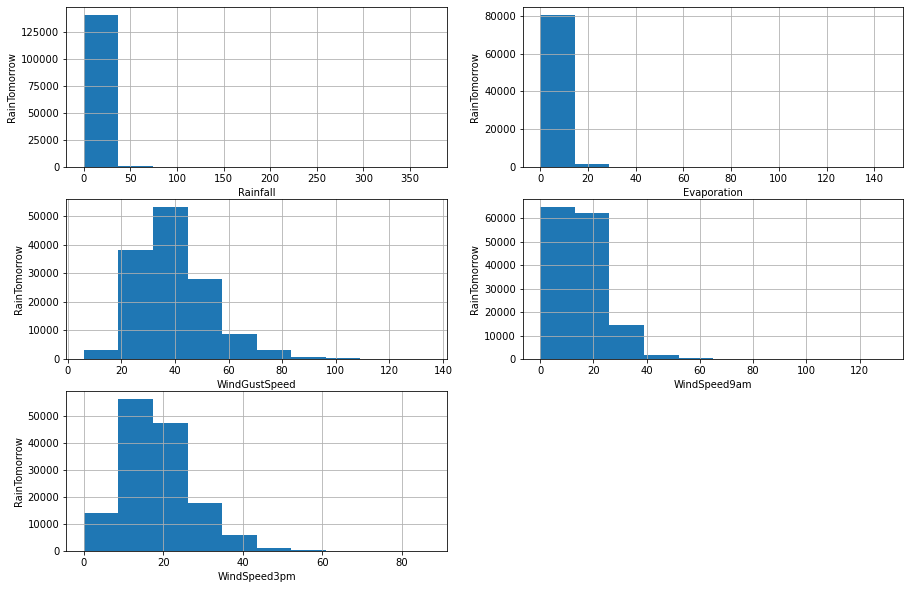

In [54]:
plt.figure(figsize=(15,10))

plt.subplot(3, 2, 1)
fig = DF.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(3, 2, 2)
fig = DF.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

plt.subplot(3, 2, 3)
fig = DF.WindGustSpeed.hist(bins=10)
fig.set_xlabel('WindGustSpeed')
fig.set_ylabel('RainTomorrow')

plt.subplot(3, 2, 4)
fig = DF.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(3, 2, 5)
fig = DF.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

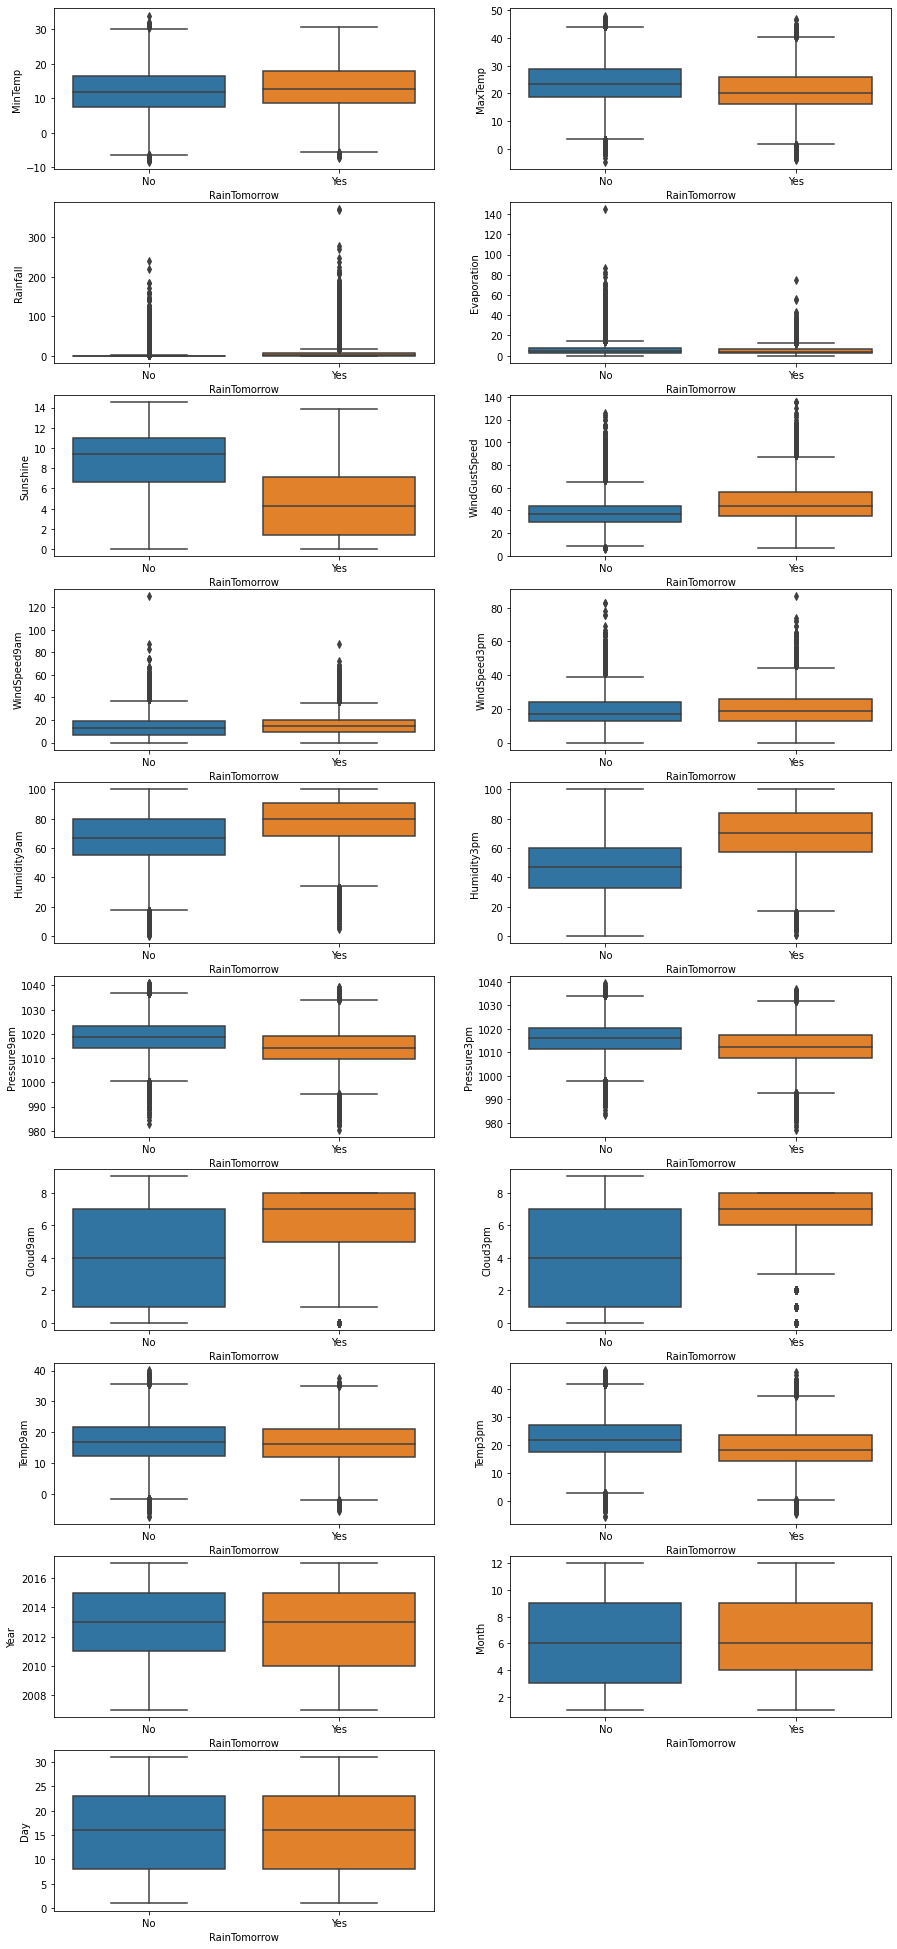

In [55]:
## check the relationship between target (raintomorrow) with all variables
plt.figure(figsize=(15,35))
count=0

for var in DF_num.columns:
    plt.subplot(10, 2, 1+count)
    fig = sb.boxplot(x = 'RainTomorrow', y = var, data = DF)
    count +=1

In [56]:
## cloud, humidity and sunshine shows highest variation >> important variable
## others shows not much variation >> not clear if important

## 2.5 Multivariate analysis

In [57]:
correlation = DF.corr()

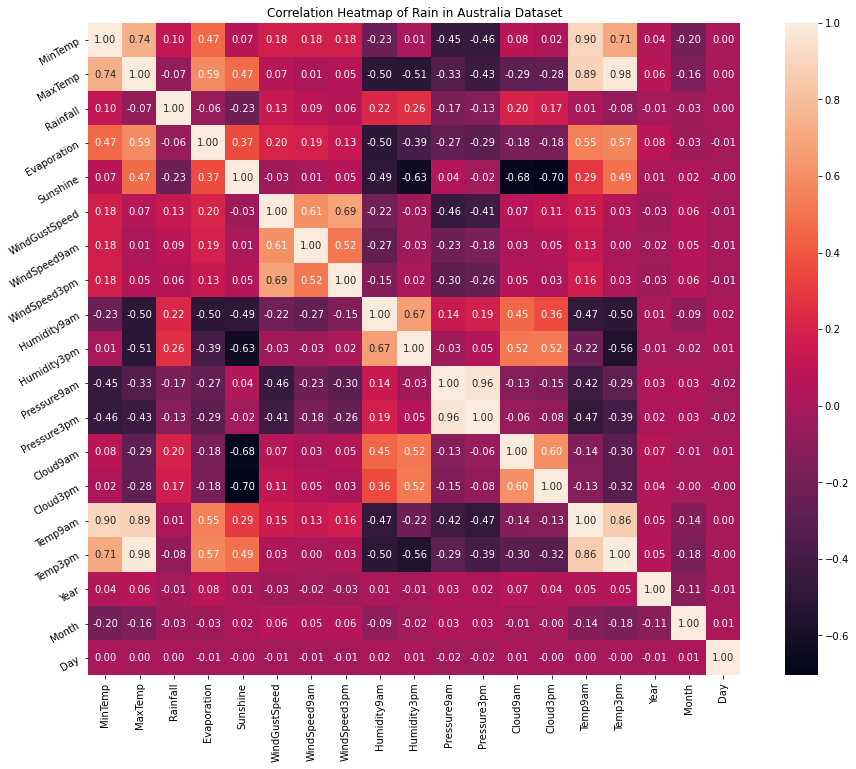

In [58]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Rain in Australia Dataset')
ax = sb.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)           
plt.show()

In [59]:
print (round(correlation,3))

               MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
MinTemp          1.000    0.737     0.104        0.467     0.073   
MaxTemp          0.737    1.000    -0.075        0.588     0.470   
Rainfall         0.104   -0.075     1.000       -0.064    -0.228   
Evaporation      0.467    0.588    -0.064        1.000     0.366   
Sunshine         0.073    0.470    -0.228        0.366     1.000   
WindGustSpeed    0.177    0.068     0.134        0.203    -0.035   
WindSpeed9am     0.175    0.014     0.087        0.193     0.005   
WindSpeed3pm     0.175    0.050     0.058        0.129     0.054   
Humidity9am     -0.233   -0.504     0.224       -0.504    -0.491   
Humidity3pm      0.006   -0.509     0.256       -0.390    -0.629   
Pressure9am     -0.451   -0.332    -0.168       -0.270     0.042   
Pressure3pm     -0.461   -0.427    -0.127       -0.294    -0.020   
Cloud9am         0.079   -0.289     0.199       -0.184    -0.675   
Cloud3pm         0.022   -0.278     0.172       

variables which are highly positively correlated: 

MinTemp and MaxTemp variables are highly positively correlated (correlation coefficient = 0.74).

MinTemp and Temp3pm variables are also highly positively correlated (correlation coefficient = 0.71).

MinTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.90).

MaxTemp and Temp9am variables are strongly positively correlated (correlation coefficient = 0.89).

MaxTemp and Temp3pm variables are also strongly positively correlated (correlation coefficient = 0.98).

WindGustSpeed and WindSpeed3pm variables are highly positively correlated (correlation coefficient = 0.69).

Pressure9am and Pressure3pm variables are strongly positively correlated (correlation coefficient = 0.96).

Temp9am and Temp3pm variables are strongly positively correlated (correlation coefficient = 0.86).




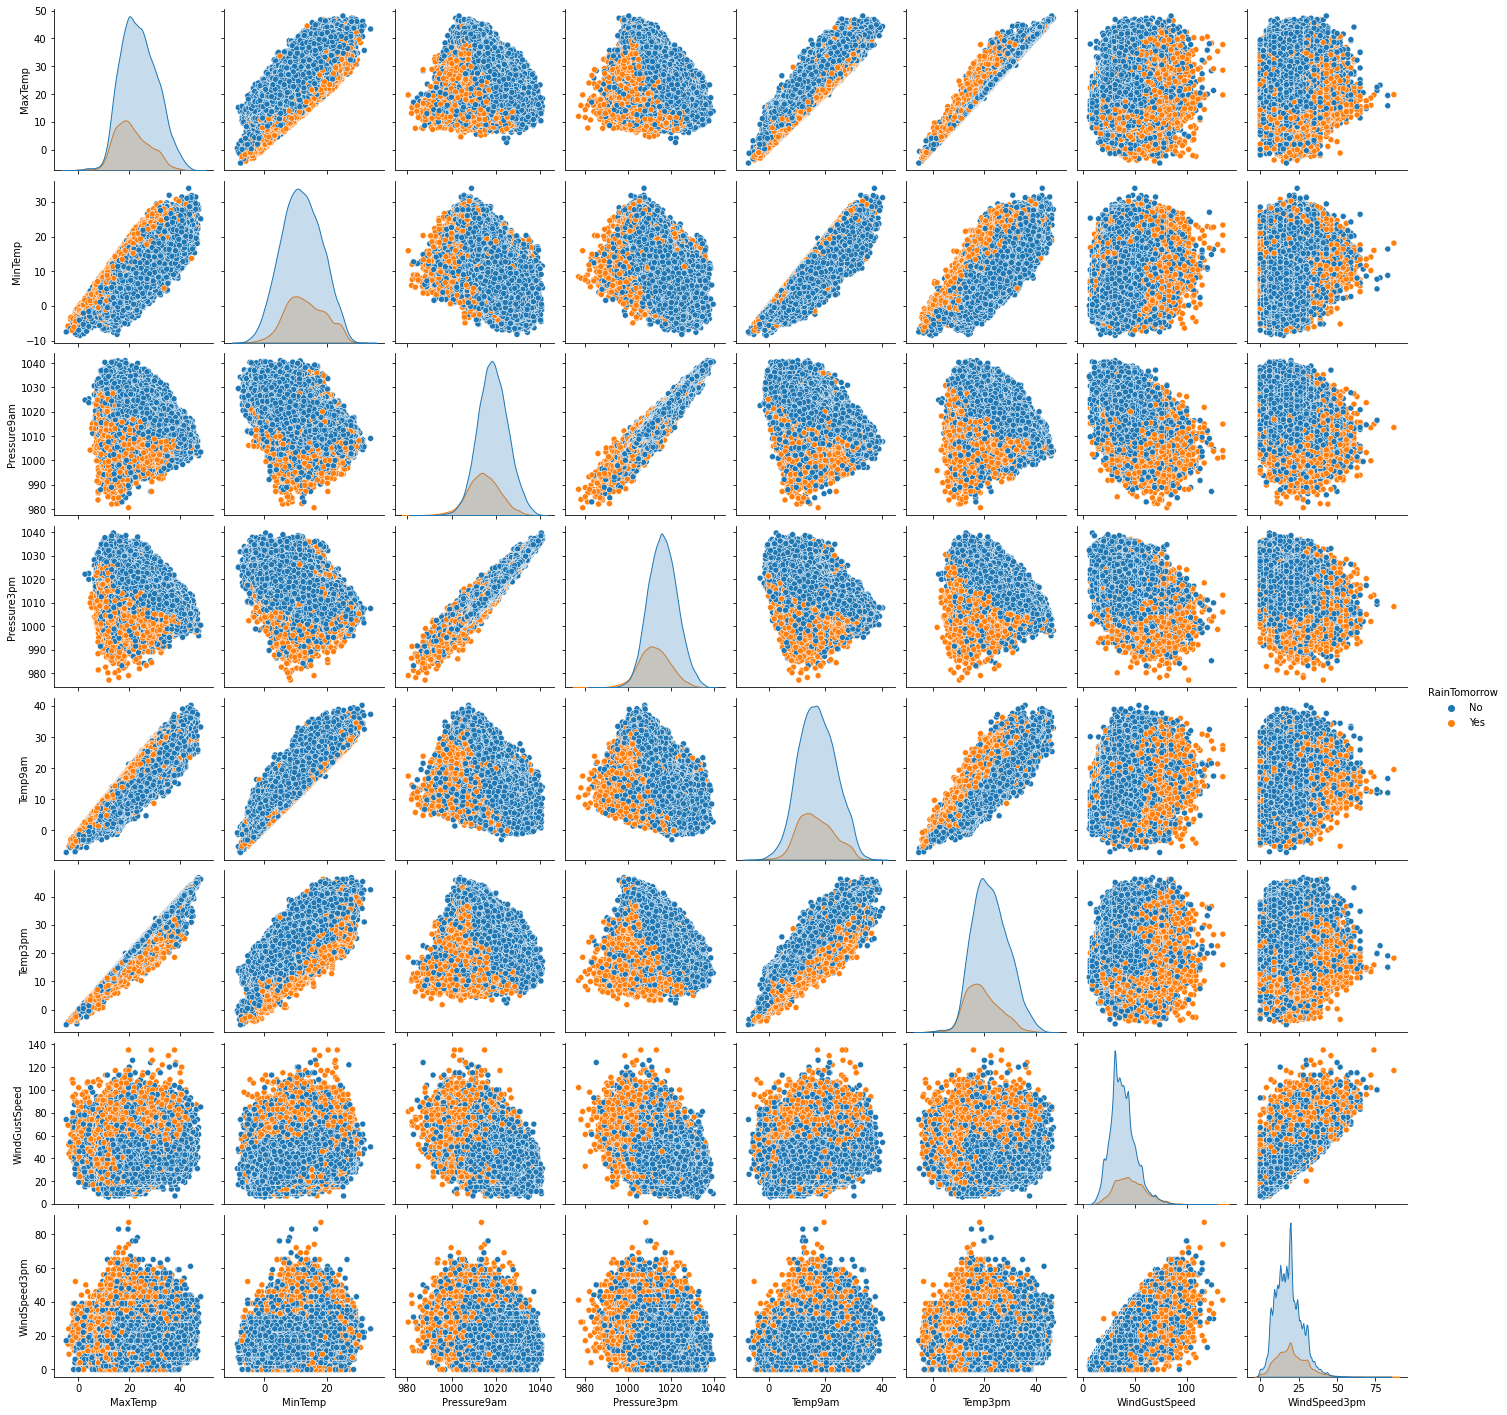

In [60]:
sb.pairplot( data=DF
            , vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'WindGustSpeed','WindSpeed3pm')
            , hue='RainTomorrow' )

# 2.6 Analyse missing values in all variables

In [61]:
missing_values=DF.isnull().sum()
missing_values

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
dtype: int64

In [62]:
percent_missing = DF.isnull().sum()/DF.shape[0]*100
percent_missing

Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
Year              0.000000
Month             0.000000
Day               0.000000
dtype: float64

In [63]:
value = {'missing_values ':missing_values,
         'percent_missing %':percent_missing ,
         'data type' : DF.dtypes}
frame=pd.DataFrame(value)
frame

missing_values   percent_missing % data type
Location                     0           0.000000    object
MinTemp                   1485           1.020899   float64
MaxTemp                   1261           0.866905   float64
Rainfall                  3261           2.241853   float64
Evaporation              62790          43.166506   float64
Sunshine                 69835          48.009762   float64
WindGustDir              10326           7.098859    object
WindGustSpeed            10263           7.055548   float64
WindDir9am               10566           7.263853    object
WindDir3pm                4228           2.906641    object
WindSpeed9am              1767           1.214767   float64
WindSpeed3pm              3062           2.105046   float64
Humidity9am               2654           1.824557   float64
Humidity3pm               4507           3.098446   float64
Pressure9am              15065          10.356799   float64
Pressure3pm              15028          10.331363   float64
Cloud9am                 55888          38.421559   float64
Cloud3pm                 59358          40.807095   float64
Temp9am                   1767           1.214767   float64
Temp3pm                   3609           2.481094   float64
RainToday                 3261           2.241853    object
RainTomorrow              3267           2.245978    object
Year                         0           0.000000     int64
Month                        0           0.000000     int64
Day                          0           0.000000     int64

<AxesSubplot:>

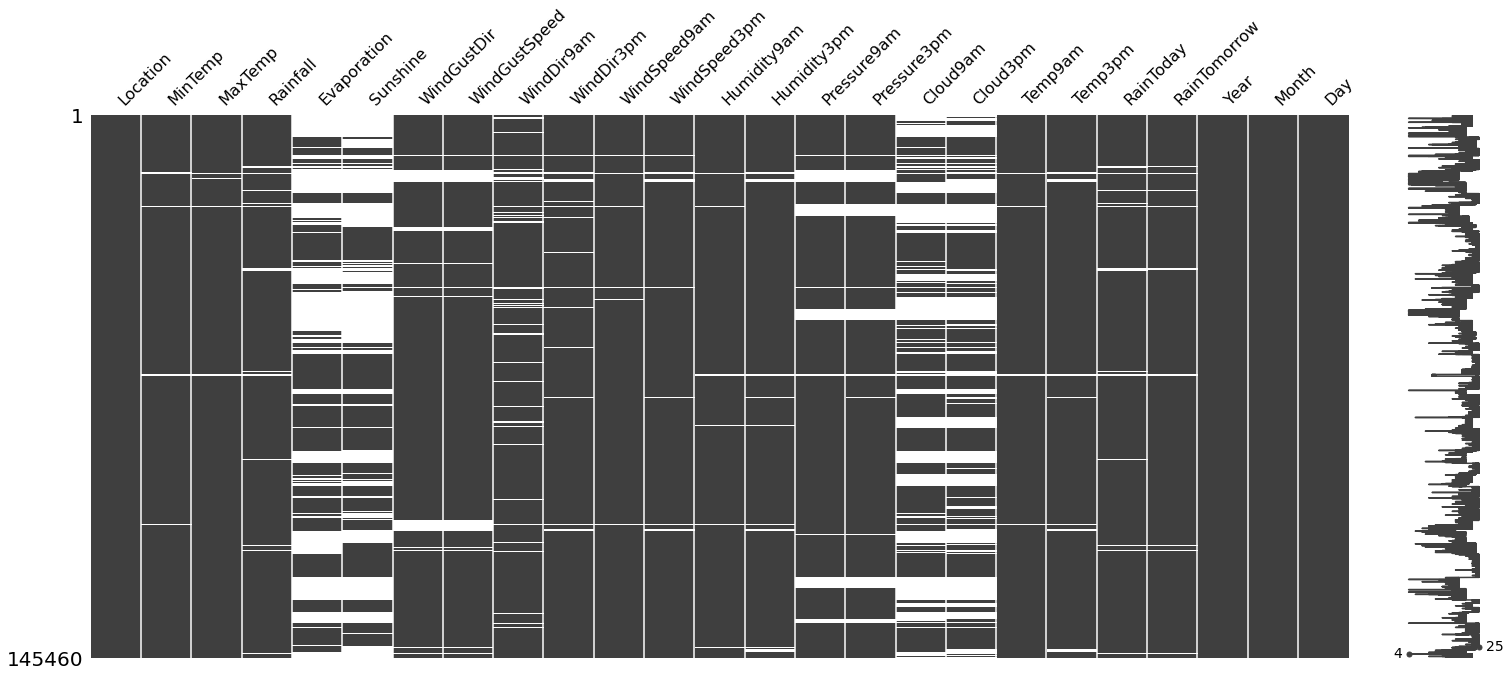

In [64]:
import missingno as msno

msno.matrix(DF)

<AxesSubplot:>

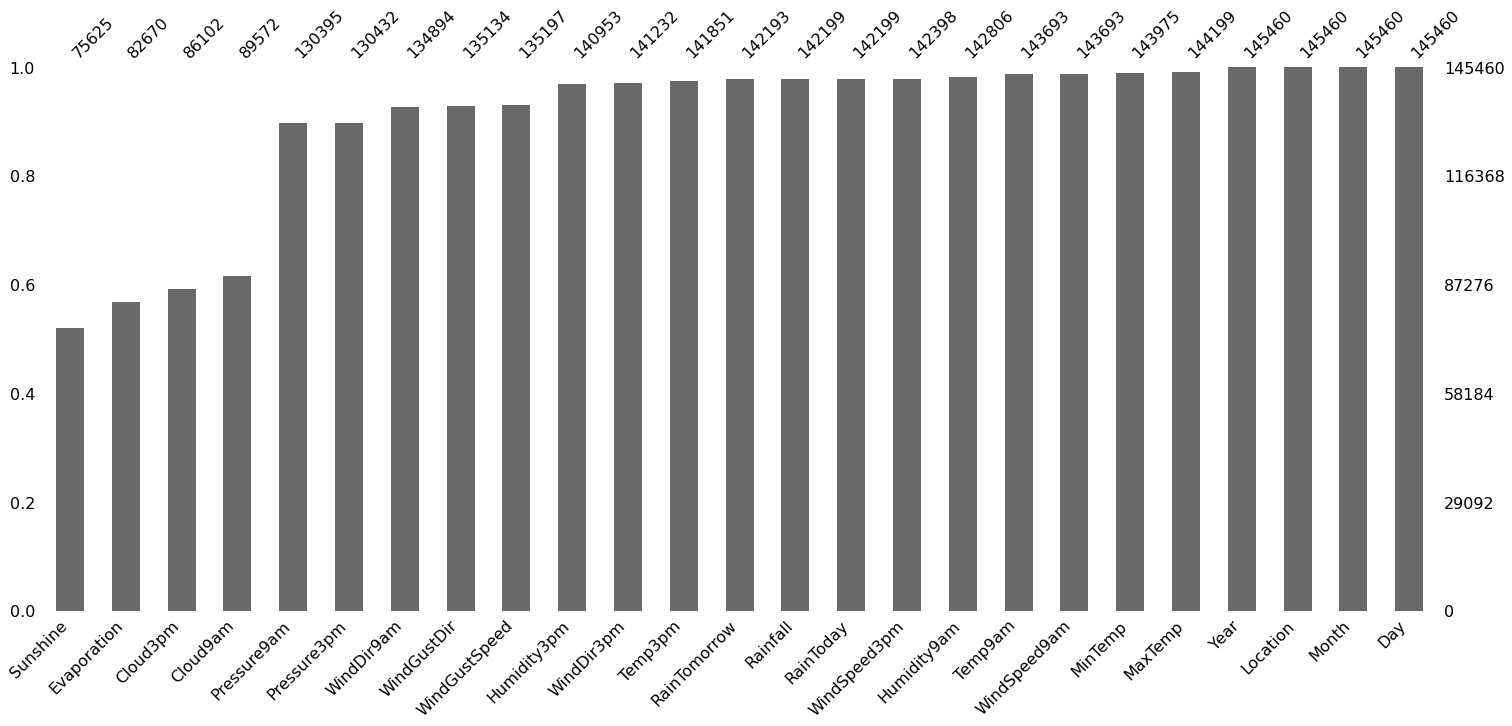

In [65]:
msno.bar(DF,sort='ascending')

<AxesSubplot:>

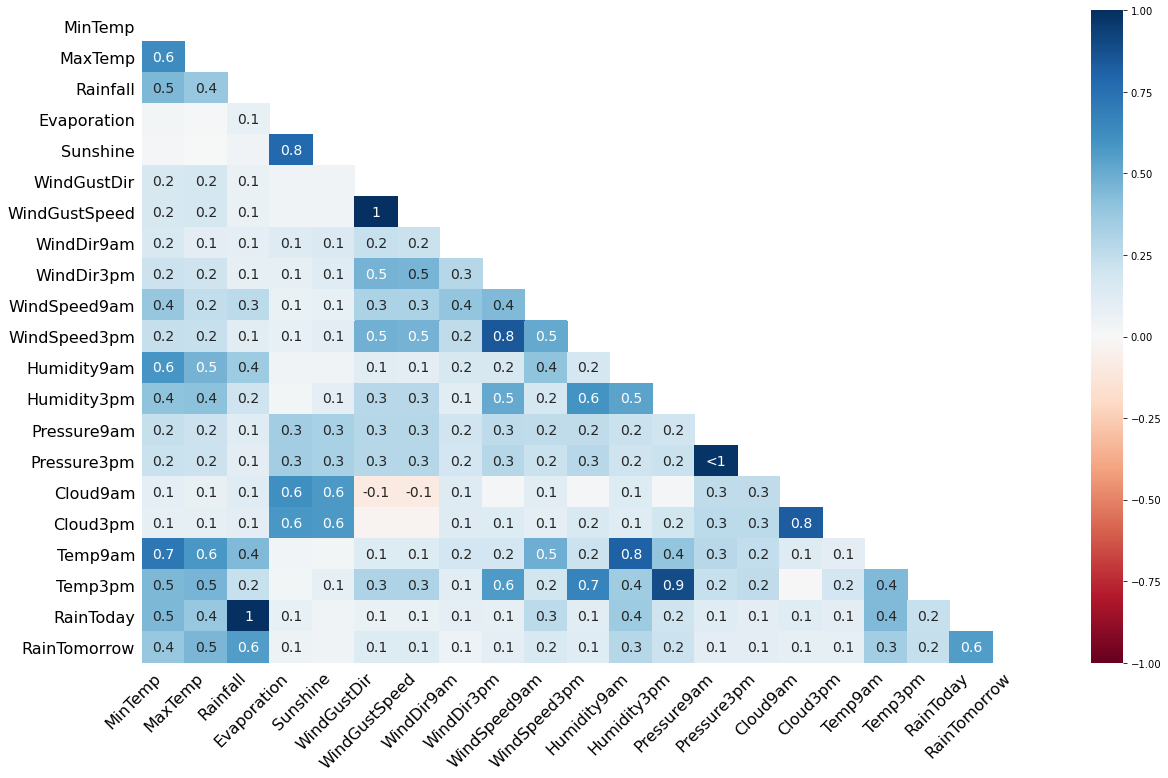

In [66]:
msno.heatmap(DF)

# 3. Data spliting

### 3.1 declare feature variable and target variable

In [67]:
X = DF.drop(['RainTomorrow'], axis=1)

#target
y = DF['RainTomorrow']

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 12345)

In [69]:
X_train.shape, X_test.shape

((116368, 24), (29092, 24))

In [70]:
categorical = [var for var in X_train.columns if X_train[var].dtypes == 'O']

numerical = [var for var in X_train.columns if X_train[var].dtypes != 'O']
 
print ('categorical var:' ,categorical)
print()
print ('numerical var:' ,numerical)

categorical var: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

numerical var: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


### 3.2 replace missing values in numerical variables

In [71]:
X_train[numerical].isnull().sum()

MinTemp           1170
MaxTemp            994
Rainfall          2598
Evaporation      50252
Sunshine         55979
WindGustSpeed     8141
WindSpeed9am      1425
WindSpeed3pm      2409
Humidity9am       2111
Humidity3pm       3542
Pressure9am      12019
Pressure3pm      11979
Cloud9am         44802
Cloud3pm         47543
Temp9am           1413
Temp3pm           2830
Year                 0
Month                0
Day                  0
dtype: int64

In [72]:
X_test[numerical].isnull().sum()

MinTemp            315
MaxTemp            267
Rainfall           663
Evaporation      12538
Sunshine         13856
WindGustSpeed     2122
WindSpeed9am       342
WindSpeed3pm       653
Humidity9am        543
Humidity3pm        965
Pressure9am       3046
Pressure3pm       3049
Cloud9am         11086
Cloud3pm         11815
Temp9am            354
Temp3pm            779
Year                 0
Month                0
Day                  0
dtype: int64

In [73]:
# print percentage of missings values in the numerical variables
for var in numerical:
    if X_train[var].isnull().mean()>0:
        print(var, round(X_train[var].isnull().mean(),4))

MinTemp 0.0101
MaxTemp 0.0085
Rainfall 0.0223
Evaporation 0.4318
Sunshine 0.4811
WindGustSpeed 0.07
WindSpeed9am 0.0122
WindSpeed3pm 0.0207
Humidity9am 0.0181
Humidity3pm 0.0304
Pressure9am 0.1033
Pressure3pm 0.1029
Cloud9am 0.385
Cloud3pm 0.4086
Temp9am 0.0121
Temp3pm 0.0243


In [74]:
# fill missing value with respective median of training set
for df1 in [X_train, X_test]:
    for var in numerical:
        var_median=X_train[var].median()
        df1[var].fillna(var_median, inplace=True)   

In [75]:
X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [76]:
X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

### 3.3 replace missing values in categorical variables

In [77]:
# X_train & X_test
X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.070406
WindDir9am     0.072846
WindDir3pm     0.028565
RainToday      0.022326
dtype: float64

In [78]:
for var in categorical:
    if X_train[var].isnull().mean()>0:
        print(var, (X_train[var].isnull().mean()))

WindGustDir 0.07040595352674275
WindDir9am 0.07284648700673725
WindDir3pm 0.028564553829231405
RainToday 0.0223257252853018


In [79]:
#replace missing values with mode of training set
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [80]:
X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [81]:
X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [82]:
X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [83]:
X_train.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
107867       Woomera      3.0     17.5       0.2          3.6       4.3   
112317   Witchcliffe     13.7     21.5       0.8          4.8       8.4   
40333    Williamtown     16.0     25.8       0.0         15.2       8.4   
93092      GoldCoast     20.9     29.4       0.0          4.8       8.4   
102391  MountGambier     12.4     22.0       0.0          4.8       8.4   

       WindGustDir  WindGustSpeed WindDir9am WindDir3pm  ...  Pressure9am  \
107867           W           43.0         SE        NNW  ...       1020.8   
112317           S           54.0        SSE        SSE  ...       1015.1   
40333           SE           35.0        NNW         SE  ...       1024.7   
93092          NNE           33.0        SSE        NNE  ...       1015.3   
102391          SW           33.0          W         SW  ...       1020.1   

        Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  Year  \
107867       1017.2       0.0       0.0      9.2     16.6         No  2015   
112317       1017.3       5.0       5.0     19.3     17.6         No  2010   
40333        1021.9       7.0       2.0     19.1     25.0         No  2011   
93092        1010.8       5.0       5.0     26.1     27.0         No  2016   
102391       1018.5       8.0       4.0     15.8     20.7         No  2017   

        Month  Day  
107867      7   23  
112317     12    8  
40333       3    7  
93092      12   20  
102391      1   15  

[5 rows x 24 columns]

In [84]:
# y_train & y_test
y_train = pd.DataFrame (y_train)
y_test = pd.DataFrame (y_test)

In [85]:
y_train.isnull().sum()

RainTomorrow    2611
dtype: int64

In [86]:
y_test.isnull().sum()

RainTomorrow    656
dtype: int64

In [87]:
y_train.isnull().mean()

RainTomorrow    0.022437
dtype: float64

In [88]:
for df3 in [y_train, y_test]:
    df3['RainTomorrow'].fillna(y_train['RainTomorrow'].mode()[0], inplace=True)

In [89]:
y_train.isnull().sum()

RainTomorrow    0
dtype: int64

In [90]:
y_test.isnull().sum()

RainTomorrow    0
dtype: int64

In [91]:
y_train.head()

RainTomorrow
107867          Yes
112317           No
40333            No
93092            No
102391           No

## 3.4 Remove outliers in highly skewed numerical variables

In [92]:
def max_value(df4, variable, top):
    return np.where(df4[variable]>top, top, df4[variable])

for df4 in [X_train, X_test]:
    df4['Rainfall'] = max_value(df4, 'Rainfall', 3.2)
    df4['Evaporation'] = max_value(df4, 'Evaporation', 21.8)
    df4['WindSpeed9am'] = max_value(df4, 'WindSpeed9am', 55)
    df4['WindSpeed3pm'] = max_value(df4, 'WindSpeed3pm', 57)
    df4['WindGustSpeed'] = max_value(df4, 'WindGustSpeed', 99)

In [93]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [94]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [95]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [96]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [97]:
X_train.WindGustSpeed.max(), X_test.WindGustSpeed.max()

(99.0, 99.0)

In [98]:
X_train[numerical].describe()

MinTemp        MaxTemp       Rainfall    Evaporation  \
count  116368.000000  116368.000000  116368.000000  116368.000000   
mean       12.182757      23.208934       0.669967       5.138595   
std         6.363943       7.081079       1.181554       2.802871   
min        -8.200000      -4.800000       0.000000       0.000000   
25%         7.600000      18.000000       0.000000       4.000000   
50%        12.000000      22.600000       0.000000       4.800000   
75%        16.800000      28.100000       0.600000       5.200000   
max        33.900000      48.100000       3.200000      21.800000   

            Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  116368.000000  116368.000000  116368.000000  116368.000000   
mean        7.990673      39.958777      14.043457      18.668483   
std         2.753263      13.098743       8.854764       8.709498   
min         0.000000       7.000000       0.000000       0.000000   
25%         8.200000      31.000000       7.000000      13.000000   
50%         8.400000      39.000000      13.000000      19.000000   
75%         8.700000      46.000000      19.000000      24.000000   
max        14.500000      99.000000      55.000000      57.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  116368.000000  116368.000000  116368.000000  116368.000000   
mean       68.903212      51.551939    1017.647923    1015.252090   
std        18.872680      20.477579       6.736491       6.675524   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1013.500000    1011.100000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      65.000000    1021.800000    1019.400000   
max       100.000000     100.000000    1041.000000    1038.900000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  \
count  116368.000000  116368.000000  116368.000000  116368.000000   
mean        4.661213       4.712808      16.981241      21.662094   
std         2.283215       2.107103       6.443628       6.850388   
min         0.000000       0.000000      -7.200000      -5.400000   
25%         3.000000       4.000000      12.300000      16.700000   
50%         5.000000       5.000000      16.700000      21.100000   
75%         6.000000       6.000000      21.500000      26.200000   
max         9.000000       8.000000      39.400000      46.200000   

                Year          Month            Day  
count  116368.000000  116368.000000  116368.000000  
mean     2012.774560       6.401485      15.722295  
std         2.538048       3.425631       8.807675  
min      2007.000000       1.000000       1.000000  
25%      2011.000000       3.000000       8.000000  
50%      2013.000000       6.000000      16.000000  
75%      2015.000000       9.000000      23.000000  
max      2017.000000      12.000000      31.000000

## 3.5 encode categorical variables

In [99]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in X_train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    X_train[col] = lencoders[col].fit_transform(X_train[col])
    
for col in X_test.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    X_test[col] = lencoders[col].fit_transform(X_test[col])
    

lencoders = LabelEncoder()
y_train['RainTomorrow'] = lencoders.fit_transform(y_train['RainTomorrow'])
y_test['RainTomorrow'] = lencoders.fit_transform(y_test['RainTomorrow'])

In [100]:
X_train[categorical].head()

Location  WindGustDir  WindDir9am  WindDir3pm  RainToday
107867        48           13           9           6          0
112317        46            8          10          10          0
40333         45            9           6           9          0
93092         14            5          10           5          0
102391        22           12          13          12          0

In [101]:
y_train.head()

RainTomorrow
107867             1
112317             0
40333              0
93092              0
102391             0

# 4. scaling

In [102]:
X_train.describe()

Location        MinTemp        MaxTemp       Rainfall  \
count  116368.000000  116368.000000  116368.000000  116368.000000   
mean       23.803563      12.182757      23.208934       0.669967   
std        14.235207       6.363943       7.081079       1.181554   
min         0.000000      -8.200000      -4.800000       0.000000   
25%        11.000000       7.600000      18.000000       0.000000   
50%        24.000000      12.000000      22.600000       0.000000   
75%        36.000000      16.800000      28.100000       0.600000   
max        48.000000      33.900000      48.100000       3.200000   

         Evaporation       Sunshine    WindGustDir  WindGustSpeed  \
count  116368.000000  116368.000000  116368.000000  116368.000000   
mean        5.138595       7.990673       8.082961      39.958777   
std         2.802871       2.753263       4.699263      13.098743   
min         0.000000       0.000000       0.000000       7.000000   
25%         4.000000       8.200000       4.000000      31.000000   
50%         4.800000       8.400000       9.000000      39.000000   
75%         5.200000       8.700000      13.000000      46.000000   
max        21.800000      14.500000      15.000000      99.000000   

          WindDir9am     WindDir3pm  ...    Pressure9am    Pressure3pm  \
count  116368.000000  116368.000000  ...  116368.000000  116368.000000   
mean        6.999261       7.791248  ...    1017.647923    1015.252090   
std         4.517297       4.542726  ...       6.736491       6.675524   
min         0.000000       0.000000  ...     980.500000     977.100000   
25%         3.000000       4.000000  ...    1013.500000    1011.100000   
50%         7.000000       8.000000  ...    1017.600000    1015.200000   
75%        11.000000      12.000000  ...    1021.800000    1019.400000   
max        15.000000      15.000000  ...    1041.000000    1038.900000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  \
count  116368.000000  116368.000000  116368.000000  116368.000000   
mean        4.661213       4.712808      16.981241      21.662094   
std         2.283215       2.107103       6.443628       6.850388   
min         0.000000       0.000000      -7.200000      -5.400000   
25%         3.000000       4.000000      12.300000      16.700000   
50%         5.000000       5.000000      16.700000      21.100000   
75%         6.000000       6.000000      21.500000      26.200000   
max         9.000000       8.000000      39.400000      46.200000   

           RainToday           Year          Month            Day  
count  116368.000000  116368.000000  116368.000000  116368.000000  
mean        0.219210    2012.774560       6.401485      15.722295  
std         0.413713       2.538048       3.425631       8.807675  
min         0.000000    2007.000000       1.000000       1.000000  
25%         0.000000    2011.000000       3.000000       8.000000  
50%         0.000000    2013.000000       6.000000      16.000000  
75%         0.000000    2015.000000       9.000000      23.000000  
max         1.000000    2017.000000      12.000000      31.000000  

[8 rows x 24 columns]

In [103]:
cols = X_train.columns

In [104]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [105]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [106]:
X_train.head()

Location   MinTemp   MaxTemp Rainfall Evaporation  Sunshine WindGustDir  \
0  1.000000  0.266033  0.421550   0.0625    0.165138  0.296552    0.866667   
1  0.958333  0.520190  0.497164   0.2500    0.220183  0.579310    0.533333   
2  0.937500  0.574822  0.578450   0.0000    0.697248  0.579310    0.600000   
3  0.291667  0.691211  0.646503   0.0000    0.220183  0.579310    0.333333   
4  0.458333  0.489311  0.506616   0.0000    0.220183  0.579310    0.800000   

  WindGustSpeed WindDir9am WindDir3pm  ... Pressure9am Pressure3pm  Cloud9am  \
0      0.391304   0.600000   0.400000  ...    0.666116    0.648867  0.000000   
1      0.510870   0.666667   0.666667  ...    0.571901    0.650485  0.555556   
2      0.304348   0.400000   0.600000  ...    0.730579    0.724919  0.777778   
3      0.282609   0.666667   0.333333  ...    0.575207    0.545307  0.555556   
4      0.282609   0.866667   0.800000  ...    0.654545    0.669903  0.888889   

  Cloud3pm   Temp9am   Temp3pm RainToday Year     Month       Day  
0    0.000  0.351931  0.426357       0.0  0.8  0.545455  0.733333  
1    0.625  0.568670  0.445736       0.0  0.3  1.000000  0.233333  
2    0.250  0.564378  0.589147       0.0  0.4  0.181818  0.200000  
3    0.625  0.714592  0.627907       0.0  0.9  1.000000  0.633333  
4    0.500  0.493562  0.505814       0.0  1.0  0.000000  0.466667  

[5 rows x 24 columns]

In [107]:
X_train.describe()

Location        MinTemp        MaxTemp       Rainfall  \
count  116368.000000  116368.000000  116368.000000  116368.000000   
mean        0.495908       0.484151       0.529469       0.209365   
std         0.296567       0.151163       0.133858       0.369236   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.229167       0.375297       0.431002       0.000000   
50%         0.500000       0.479810       0.517958       0.000000   
75%         0.750000       0.593824       0.621928       0.187500   
max         1.000000       1.000000       1.000000       1.000000   

         Evaporation       Sunshine    WindGustDir  WindGustSpeed  \
count  116368.000000  116368.000000  116368.000000  116368.000000   
mean        0.235715       0.551081       0.538864       0.358248   
std         0.128572       0.189880       0.313284       0.142378   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.183486       0.565517       0.266667       0.260870   
50%         0.220183       0.579310       0.600000       0.347826   
75%         0.238532       0.600000       0.866667       0.423913   
max         1.000000       1.000000       1.000000       1.000000   

          WindDir9am     WindDir3pm  ...    Pressure9am    Pressure3pm  \
count  116368.000000  116368.000000  ...  116368.000000  116368.000000   
mean        0.466617       0.519417  ...       0.614015       0.617348   
std         0.301153       0.302848  ...       0.111347       0.108018   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.200000       0.266667  ...       0.545455       0.550162   
50%         0.466667       0.533333  ...       0.613223       0.616505   
75%         0.733333       0.800000  ...       0.682645       0.684466   
max         1.000000       1.000000  ...       1.000000       1.000000   

            Cloud9am       Cloud3pm        Temp9am        Temp3pm  \
count  116368.000000  116368.000000  116368.000000  116368.000000   
mean        0.517913       0.589101       0.518911       0.524459   
std         0.253691       0.263388       0.138275       0.132759   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.333333       0.500000       0.418455       0.428295   
50%         0.555556       0.625000       0.512876       0.513566   
75%         0.666667       0.750000       0.615880       0.612403   
max         1.000000       1.000000       1.000000       1.000000   

           RainToday           Year          Month            Day  
count  116368.000000  116368.000000  116368.000000  116368.000000  
mean        0.219210       0.577456       0.491044       0.490743  
std         0.413713       0.253805       0.311421       0.293589  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.400000       0.181818       0.233333  
50%         0.000000       0.600000       0.454545       0.500000  
75%         0.000000       0.800000       0.727273       0.733333  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 24 columns]

# 5. Model training

In [108]:
### define helpful function
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [109]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [110]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Reds, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.8404716073147257
ROC Area under Curve = 0.707787727275667
Cohen's Kappa = 0.47355065637971683
Time taken = 2.3128902912139893
              precision    recall  f1-score   support

           0    0.86212   0.94633   0.90226     22637
           1    0.71371   0.46925   0.56622      6455

    accuracy                        0.84047     29092
   macro avg    0.78792   0.70779   0.73424     29092
weighted avg    0.82919   0.84047   0.82770     29092



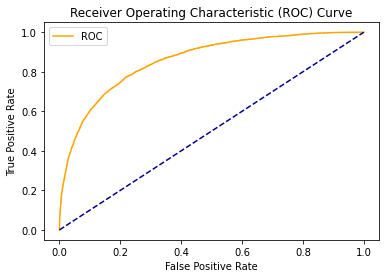

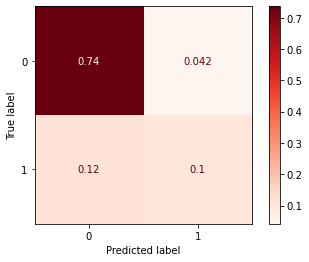

In [111]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver='liblinear', random_state=12345)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.8326687749209405
ROC Area under Curve = 0.6826185491032193
Cohen's Kappa = 0.42977553789007705
Time taken = 0.2180483341217041
              precision    recall  f1-score   support

           0    0.85049   0.95238   0.89855     22637
           1    0.71200   0.41286   0.52265      6455

    accuracy                        0.83267     29092
   macro avg    0.78124   0.68262   0.71060     29092
weighted avg    0.81976   0.83267   0.81515     29092



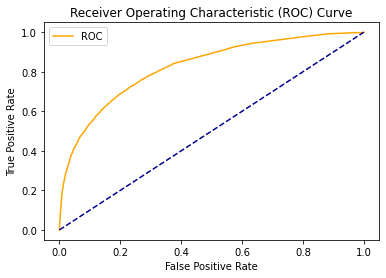

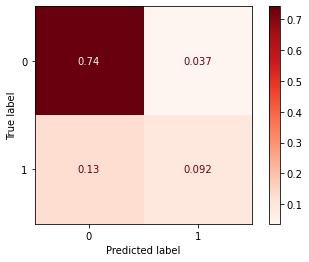

In [112]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth':8 ,
             'max_features': "sqrt",}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.8508524680324487
ROC Area under Curve = 0.7163962285308011
Cohen's Kappa = 0.5004959577469039
Time taken = 25.326184034347534
              precision    recall  f1-score   support

           0    0.86479   0.95812   0.90907     22637
           1    0.76371   0.47467   0.58546      6455

    accuracy                        0.85085     29092
   macro avg    0.81425   0.71640   0.74726     29092
weighted avg    0.84236   0.85085   0.83726     29092



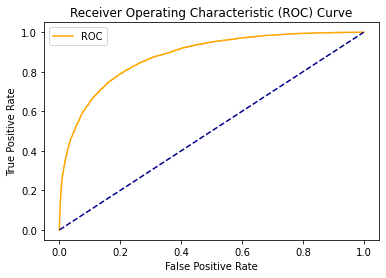

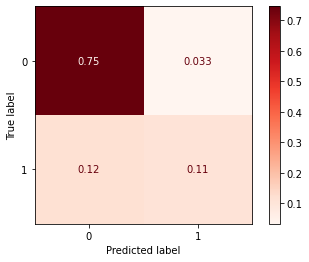

In [113]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Accuracy = 0.8546679499518768
ROC Area under Curve = 0.7357916768565081
Cohen's Kappa = 0.5284034483080948
Time taken = 0.9502904415130615
              precision    recall  f1-score   support

           0    0.87449   0.94951   0.91045     22637
           1    0.74673   0.52208   0.61451      6455

    accuracy                        0.85467     29092
   macro avg    0.81061   0.73579   0.76248     29092
weighted avg    0.84614   0.85467   0.84479     29092



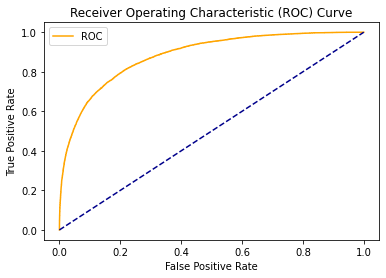

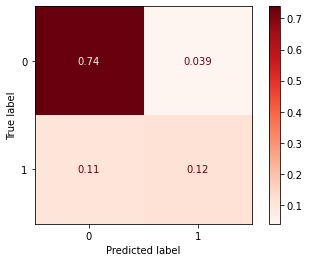

In [114]:
import lightgbm as lgb

X_train.columns = X_train.columns.get_level_values(0)

params_lgb ={'random_state': 12345}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

[19:33:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy = 0.860580228241441
ROC Area under Curve = 0.7545964708149197
Cohen's Kappa = 0.5577410405298666
Time taken = 57.27707839012146
              precision    recall  f1-score   support

           0    0.88376   0.94513   0.91342     22637
           1    0.74565   0.56406   0.64226      6455

    accuracy                        0.86058     29092
   macro avg    0.81471   0.75460   0.77784     29092
weighted avg    0.85312   0.86058   0.85325     29092



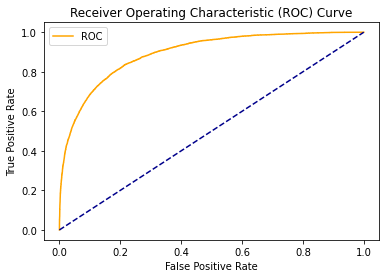

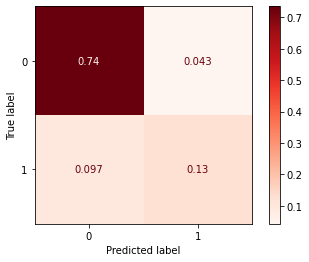

In [115]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

In [116]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_lgb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_lgb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_rf, coh_kap_lgb, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_rf, tt_lgb, tt_xgb]

In [117]:
model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','LightGBM','XGB'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}

In [118]:
data = pd.DataFrame(model_data)

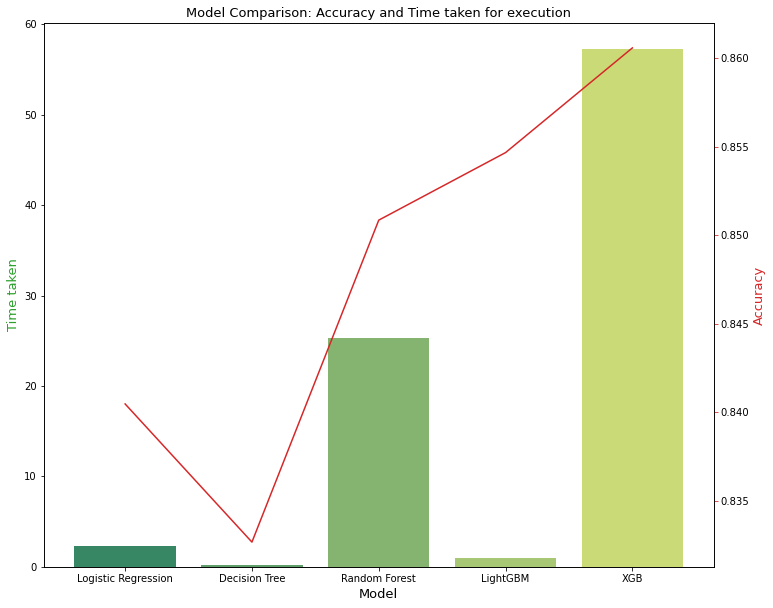

In [119]:
fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sb.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sb.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

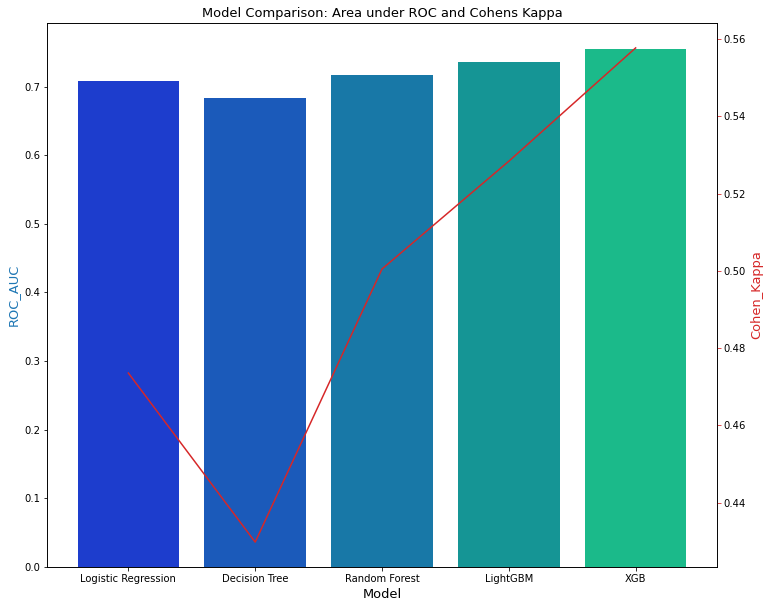

In [120]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sb.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sb.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

In [121]:
# LightGBM perform better (better accuarcy and lesser running time)

# 5. Result predicted

In [122]:
### 0 - no rain
### 1 - rain
y_pred_test = model_lgb.predict(X_test)

y_pred_test

array([1, 0, 0, ..., 0, 0, 0])

In [123]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8547


# 6. Model evaluation and improvement

In [124]:
## compare with null accuracy
# Null Accuracy : It is defined as accuracy obtained when always predicting most frequent class.
#This is quite useful to check the absoluteness of model accuracy.

In [125]:
y_test.value_counts()

RainTomorrow
0               22637
1                6455
dtype: int64

In [126]:
null_accuracy = (22637/(22637+6455))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7781


In [127]:
## since null accuracy is lower than model accuracy so we are good

### 6.1 tuning of hyperparameter

In [128]:
from sklearn.model_selection import GridSearchCV
    
param_grid = {'n_estimators':range(100, 700, 200), 
              'num_leaves':range(20,60,10),
              'max_depth':range (5,15,5),
              'min_data_in_leaf':range (20,500,100)}

lgb_estimator = model_lgb

gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid,cv=2,verbose=0,n_jobs=4)
lgb_model = gsearch.fit(X=X_train, y=y_train)

lgb_model

[LightGBM] [Warning] min_data_in_leaf is set=320, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=320


GridSearchCV(cv=2, estimator=LGBMClassifier(random_state=12345), n_jobs=4,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_data_in_leaf': range(20, 500, 100),
                         'n_estimators': range(100, 700, 200),
                         'num_leaves': range(20, 60, 10)})

In [129]:
print('GridSearch CV best score : {:.4f}\n\n'.format(gsearch.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (gsearch.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (gsearch.best_estimator_))


GridSearch CV best score : 0.8619


Parameters that give the best results : 

 {'max_depth': 10, 'min_data_in_leaf': 320, 'n_estimators': 500, 'num_leaves': 40}


Estimator that was chosen by the search : 

 LGBMClassifier(max_depth=10, min_data_in_leaf=320, n_estimators=500,
               num_leaves=40, random_state=12345)


[LightGBM] [Warning] min_data_in_leaf is set=320, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=320
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

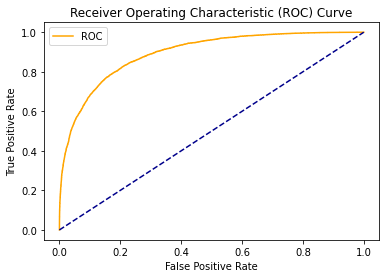

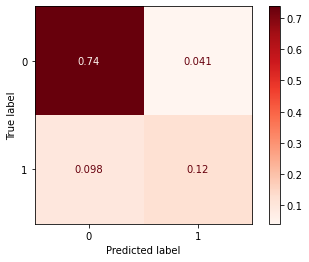

In [130]:
opti_params_lgb ={
         'max_depth': 10, 
         'min_data_in_leaf':320, 
         'n_estimators':500, 
          'num_leaves':40, 
         'random_state': 12345,
            'verbose' : 0
            }

opti_model_lgb = lgb.LGBMClassifier(**opti_params_lgb,force_col_wise=True)
opti_model_lgb, opti_accuracy_lgb, opti_roc_auc_lgb, opti_coh_kap_lgb, opti_tt_lgb = run_model(opti_model_lgb, X_train, y_train, X_test, y_test)

## 6.2 optimization of data

In [131]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116368 entries, 0 to 116367
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       116368 non-null  float64
 1   MinTemp        116368 non-null  float64
 2   MaxTemp        116368 non-null  float64
 3   Rainfall       116368 non-null  float64
 4   Evaporation    116368 non-null  float64
 5   Sunshine       116368 non-null  float64
 6   WindGustDir    116368 non-null  float64
 7   WindGustSpeed  116368 non-null  float64
 8   WindDir9am     116368 non-null  float64
 9   WindDir3pm     116368 non-null  float64
 10  WindSpeed9am   116368 non-null  float64
 11  WindSpeed3pm   116368 non-null  float64
 12  Humidity9am    116368 non-null  float64
 13  Humidity3pm    116368 non-null  float64
 14  Pressure9am    116368 non-null  float64
 15  Pressure3pm    116368 non-null  float64
 16  Cloud9am       116368 non-null  float64
 17  Cloud3pm       116368 non-nul

In [132]:
# remove highly correlated variable ('Temp9am', 'Temp3pm','Pressure9am')
X_train1 = X_train.drop(['Temp9am', 'Temp3pm'], axis=1)
X_test1 = X_test.drop(['Temp9am', 'Temp3pm'], axis=1)

[LightGBM] [Warning] min_data_in_leaf is set=320, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=320
[LightGBM] [Warning] min_data_in_leaf is set=320, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=320
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006652 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

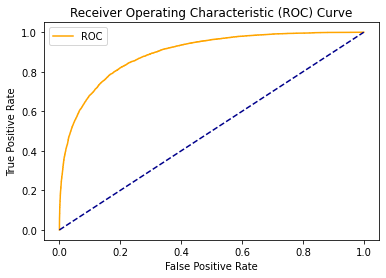

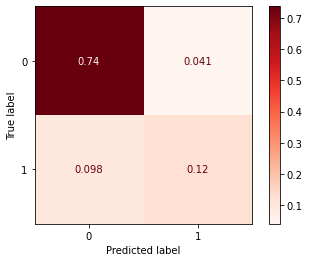

In [133]:
final_model_lgb = lgb.LGBMClassifier(**opti_params_lgb)
final_model_lgb, final_accuracy_lgb, final_roc_auc_lgb, final_coh_kap_lgb, final_tt_lgb = run_model(final_model_lgb, X_train1, y_train, X_test1, y_test)

## 6.3 model comparison and evaluation

In [134]:
## compare model_lgb(default) and opti_model_lgb (hyperparameter optimised) and final_model_lgb

In [135]:
from sklearn.metrics import mean_squared_error

In [136]:
print('Training set score: {:.4f}'.format(opti_model_lgb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(opti_model_lgb.score(X_test, y_test)))

y_train_pred = opti_model_lgb.predict(X_train)
print(y_train_pred)

print("Mean Squared Error (MSE) \t:", round(mean_squared_error(y_train, y_train_pred),5))

Training set score: 0.9010
Test set score: 0.8610
[0 0 0 ... 0 0 0]
Mean Squared Error (MSE) 	: 0.099


In [137]:
print('Training set score: {:.4f}'.format(model_lgb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model_lgb.score(X_test, y_test)))

y_test_pred = model_lgb.predict(X_test)
print(y_test_pred)

print("Mean Squared Error (MSE) \t:", round(mean_squared_error(y_test, y_test_pred),5))

Training set score: 0.8662
Test set score: 0.8547
[1 0 0 ... 0 0 0]
Mean Squared Error (MSE) 	: 0.14533


In [138]:
print('Training set score: {:.4f}'.format(final_model_lgb.score(X_train1, y_train)))

print('Test set score: {:.4f}'.format(final_model_lgb.score(X_test1, y_test)))

y_train_pred = final_model_lgb.predict(X_train1)
print(y_train_pred)

print("Mean Squared Error (MSE) \t:", round(mean_squared_error(y_train, y_train_pred),5))

Training set score: 0.9011
Test set score: 0.8611
[0 0 0 ... 0 0 0]
Mean Squared Error (MSE) 	: 0.09892


In [139]:
analysis = {'Model': ['model_lgb', 'opti_model_lgb','final_model_lgb'],
            'Feature' : ['default','hyperparameter optimised','hyperparameter & data optimised'],
            'Training set accuracy': [0.8662, 0.9010,0.9011],
            'Test set accuracy': [0.8547,0.8610,0.8611],
            'Mean Squared Error': [0.14533,0.099,0.09892]
           }

In [140]:
analysis = pd.DataFrame (analysis)

In [141]:
analysis.head()

Model                          Feature  Training set accuracy  \
0        model_lgb                          default                 0.8662   
1   opti_model_lgb         hyperparameter optimised                 0.9010   
2  final_model_lgb  hyperparameter & data optimised                 0.9011   

   Test set accuracy  Mean Squared Error  
0             0.8547             0.14533  
1             0.8610             0.09900  
2             0.8611             0.09892

In [142]:
## visualisation
accuracy_scores = [accuracy_lgb, opti_accuracy_lgb, final_accuracy_lgb]
roc_auc_scores = [roc_auc_lgb, opti_roc_auc_lgb, final_roc_auc_lgb]
coh_kap_scores = [coh_kap_lgb, opti_coh_kap_lgb, final_coh_kap_lgb]
tt = [ tt_lgb, opti_tt_lgb, final_tt_lgb]

In [150]:
Model_data = {'Model': ['default LGBM','hyperparameter optimised LGBM','hyperparameter & data optimised LGBM'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}

In [151]:
Data = pd.DataFrame(Model_data)

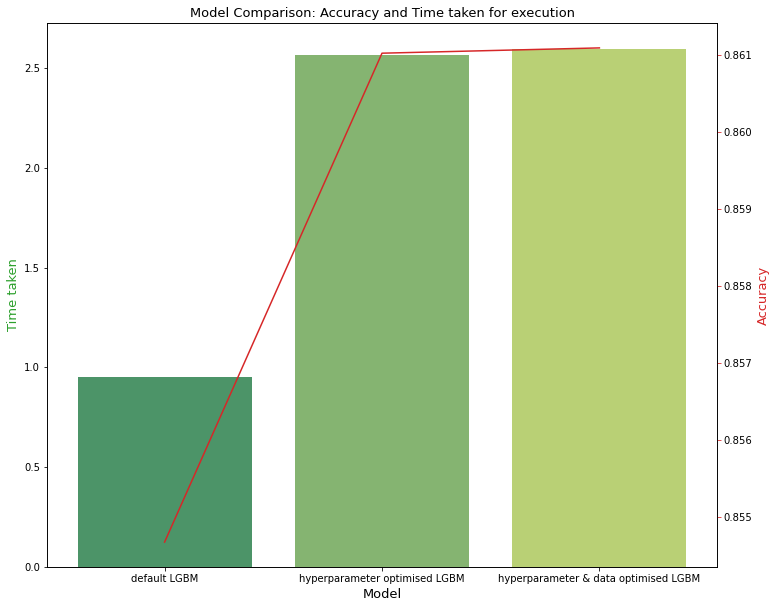

In [152]:
fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sb.barplot(x='Model', y='Time taken', data = Data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sb.lineplot(x='Model', y='Accuracy', data = Data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

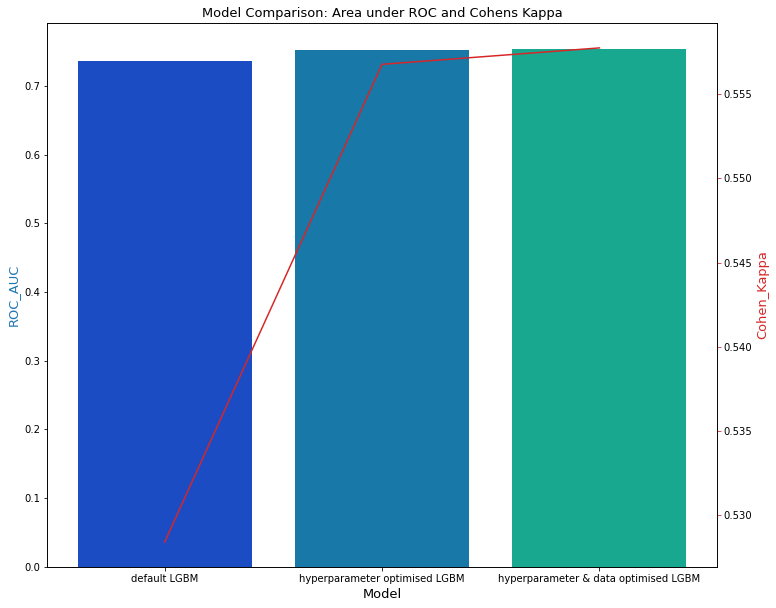

In [153]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sb.barplot(x='Model', y='ROC_AUC', data = Data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sb.lineplot(x='Model', y='Cohen_Kappa', data = Data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

## 7. final predicted result

In [154]:
y_pred_test = final_model_lgb.predict(X_test1)

y_pred_test

array([1, 0, 0, ..., 0, 0, 0])

In [155]:
## 0 -- no rain
final_model_lgb.predict_proba(X_test1)[:,0]

array([0.46468222, 0.99887808, 0.99687189, ..., 0.99753416, 0.63960628,
       0.94122608])

In [156]:
## 1 -- rain
final_model_lgb.predict_proba(X_test1)[:,1]

array([0.53531778, 0.00112192, 0.00312811, ..., 0.00246584, 0.36039372,
       0.05877392])

In [157]:
print('Final model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Final model accuracy score: 0.8611
